# Imports

In [1]:
from pathlib import Path
import pyvista as pv
import pandas as pd

from geograypher.cameras.derived_cameras import COLMAPCameraSet
from geograypher.segmentation.derived_segmentors import TabularRectangleSegmentor

/tmp/ipykernel_5709/3514485032.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/ofo-share/repos-david/conda/envs/geograypher/lib/python3.9/site-packages/pyvista/plotting/plotter.py:149: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn(


# Input data

In [2]:
DATA_FOLDER = "/ofo-share/repos-david/DoubleCounting/scratch"
IMAGE_FOLDER = "/ofo-share/repos-david/DoubleCounting/tests/data"
# These are saved from the pycolmap model
CAMERAS_FILE = Path(DATA_FOLDER, "cameras.txt")
IMAGES_FILE = Path(DATA_FOLDER, "images.txt")
POINTS_FILE = Path(DATA_FOLDER, "points3D.txt")
# This is saved from the df of predictions
DETECTIONS_FILE = Path(DATA_FOLDER, "preds.csv")

/ofo-share/repos-david/conda/envs/geograypher/lib/python3.9/site-packages/pyvista/plotting/plotter.py:149: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn(


  0%|          | 0/238 [00:00<?, ?it/s]/ofo-share/repos-david/geograypher/geograypher/utils/numeric.py:46: RuntimeWarning: invalid value encountered in scalar divide
  a_scaler = (-ab * bc + ac * bb) / denominator
/ofo-share/repos-david/geograypher/geograypher/utils/numeric.py:47: RuntimeWarning: invalid value encountered in scalar divide
  b_scaler = (ab * ac - bc * aa) / denominator
100%|██████████| 238/238 [00:00<00:00, 744.71it/s]


22


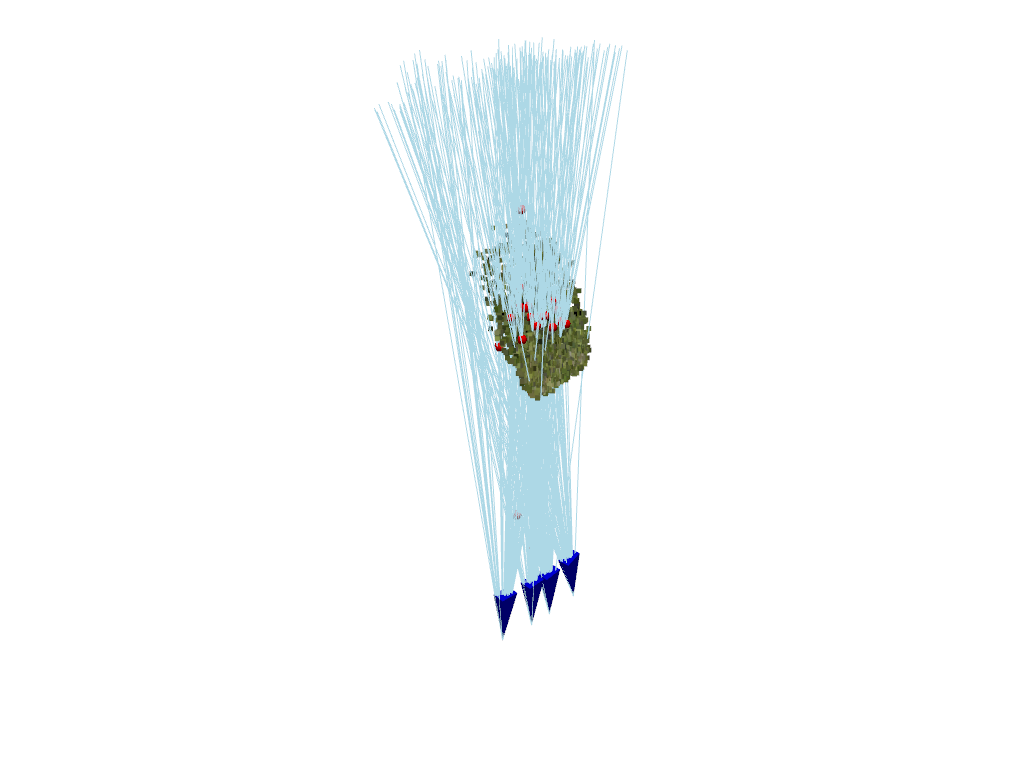

In [3]:

# Create a set of cameras from the COLMAP exports
camera_set = COLMAPCameraSet(
    cameras_file=CAMERAS_FILE,
    images_file=IMAGES_FILE,
    image_folder=IMAGE_FOLDER,
    validate_images=False,
)

# Load in the COLMAP sparse keypoints
points_df = pd.read_csv(
    POINTS_FILE,
    sep=" ",
    header=None,
    skiprows=[0, 1, 2],
    names=("POINTS3D_ID", "X", "Y", "Z", "R", "G", "B"),
    usecols=list(range(7)),
)
# Create a pyvista object from the keypoints
points_xyz = points_df[["X", "Y", "Z"]].to_numpy()
points_rgb = points_df[["R", "G", "B"]].to_numpy()
points_pv = pv.PointSet(points_xyz)

# Create a plotter to show the 3D data
plotter = pv.Plotter()
pv.start_xvfb()
# Show the keypoints
plotter.add_mesh(points_pv, scalars=points_rgb, rgb=True)

# This object reads the detections exported in the DeepForest format
segmentor = TabularRectangleSegmentor(
    pred_file_or_folder=DETECTIONS_FILE, image_folder=IMAGE_FOLDER, image_shape=(8256, 5504)
)
# Identify correspondences between detections and show them
camera_set.aggreate_detections(
    segmentor=segmentor, plotter=plotter, similarity_threshold=0.001
)
# Show the cameras
camera_set.vis(show=True, frustum_scale=10, plotter=plotter)